In [36]:
from google.colab import files
import pandas as pd

# Upload and load dataset
uploaded = files.upload()
data = pd.read_csv(next(iter(uploaded)))
data.head()

Saving train.csv to train (2).csv


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


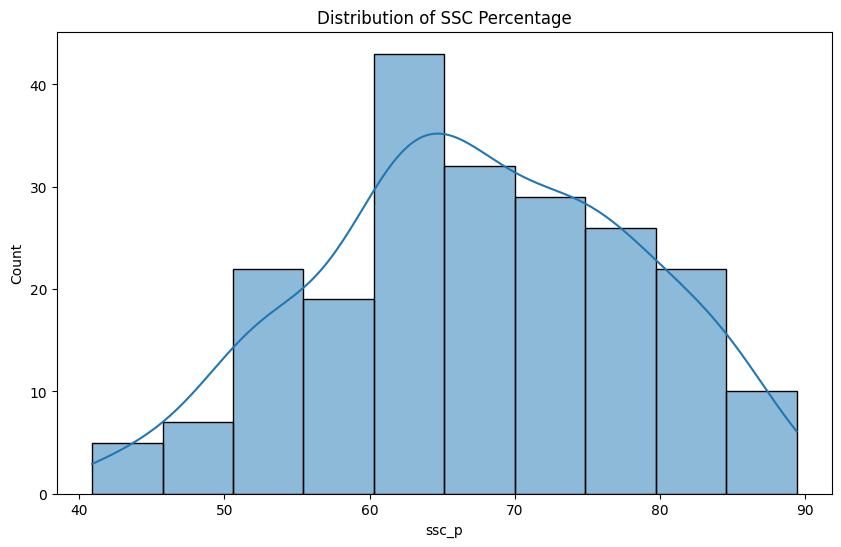

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example of distribution plot for numerical features
plt.figure(figsize=(10, 6))
sns.histplot(data['ssc_p'], kde=True)
plt.title('Distribution of SSC Percentage')
plt.show()


In [38]:
salary_mean = data['salary'].mean()
data['salary'].fillna(salary_mean, inplace=True)

# Replace other missing values with 0
data.fillna(0, inplace=True)

<ipython-input-38-494f5febeff7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['salary'].fillna(salary_mean, inplace=True)


In [39]:
from sklearn.preprocessing import LabelEncoder

data = pd.get_dummies(data, columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation'])
le = LabelEncoder()
data['status'] = le.fit_transform(data['status'])  # 1 = Placed, 0 = Not Placed


In [34]:
print(data.columns)

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status',
       'salary', 'gender_0', 'gender_1', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes',
       'specialisation_Mkt&Fin', 'specialisation_Mkt&HR'],
      dtype='object')


In [40]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['status', 'sl_no'])
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# Support Vector Classifier
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Logistic Regression Evaluation
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_log))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_log))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Support Vector Classifier (SVC) Evaluation
y_pred_svm = svm.predict(X_test)
print("\nSVC Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVC Precision:", precision_score(y_test, y_pred_svm))
print("SVC Recall:", recall_score(y_test, y_pred_svm))
print("SVC F1 Score:", f1_score(y_test, y_pred_svm))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.8153846153846154
Logistic Regression Precision: 0.8333333333333334
Logistic Regression Recall: 0.9090909090909091
Logistic Regression F1 Score: 0.8695652173913043
Logistic Regression Confusion Matrix:
 [[13  8]
 [ 4 40]]

Random Forest Accuracy: 0.8923076923076924
Random Forest Precision: 0.8627450980392157
Random Forest Recall: 1.0
Random Forest F1 Score: 0.9263157894736842
Random Forest Confusion Matrix:
 [[14  7]
 [ 0 44]]

SVC Accuracy: 0.676923076923077
SVC Precision: 0.676923076923077
SVC Recall: 1.0
SVC F1 Score: 0.8073394495412844
SVC Confusion Matrix:
 [[ 0 21]
 [ 0 44]]


In [45]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), ('svm', svm)], voting='soft')
voting_clf.fit(X_train, y_train)

# Predictions using the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluation for Voting Classifier
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classifier Precision:", precision_score(y_test, y_pred_voting))
print("Voting Classifier Recall:", recall_score(y_test, y_pred_voting))
print("Voting Classifier F1 Score:", f1_score(y_test, y_pred_voting))
print("Voting Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.8769230769230769
Voting Classifier Precision: 0.86
Voting Classifier Recall: 0.9772727272727273
Voting Classifier F1 Score: 0.9148936170212766
Voting Classifier Confusion Matrix:
 [[14  7]
 [ 1 43]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
